In [1]:
import sys 
sys.path.append ('/usr/local/lib/python3.9/site-packages')

import pandas as pd
import numpy
import matplotlib.pyplot as plt
#from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('TelTel.io-call-list-2020-11-09-2021-01-31-6009c3628ca81.csv', header=1)
#df.head()

In [3]:
#df.columns

In [4]:
df['Duration(sec)'] = df['Duration(sec)'].fillna(0)

list1 = df["Duration(sec)"].tolist()
#print(list1)

In [5]:
#------Buy Price----
ratebuy = 0.0062
sumsec = sum(list1)
summin = sumsec/60
totalbuy = summin*ratebuy

print("We buy for:", "{:.2f}".format(totalbuy), "EUR")

print('\n')

#------1-1--Revenue----

ratesell = 0.014
total1_1 = summin*ratesell
revenue1_1 = total1_1-totalbuy

print("1-1 Rate minutes:","{:.2f}".format(summin), "min")
print("1-1 Rate revenue:","{:.2f}".format(total1_1), "EUR")
print("And we made ", "{:.2f}".format(revenue1_1), "EUR")

print('\n')

#------3-30-6-----

totalsec = 0

for n in list1:
    if n >= 3 and n < 30:
        totalsec += 30
    if n >= 30:
        the6float = n/6
        the6dec = int(the6float)
        totalsec += (the6dec+1)*6
    
totalmin = totalsec/60
total3_30_6 = totalmin*ratesell
revenue3_30_6 = total3_30_6-totalbuy

#print(datetime.today())
print("3-30-6 Rate minutes:", totalmin, "min")
print("3-30-6 Rate revenue:", "{:.2f}".format(total3_30_6), "EUR")
print("And we made ", "{:.2f}".format(revenue3_30_6), "EUR")

We buy for: 1132.63 EUR


1-1 Rate minutes: 182682.80 min
1-1 Rate revenue: 2557.56 EUR
And we made  1424.93 EUR


3-30-6 Rate minutes: 187757.1 min
3-30-6 Rate revenue: 2628.60 EUR
And we made  1495.97 EUR


In [6]:
dict = {"Billing Type":["1-1", "3-30-6"],
        "Billed Min":[summin, totalmin], 
        "Buy Price":[totalbuy, totalbuy], 
        "Sell Price":[total1_1, total3_30_6],
        "Revenue":[revenue1_1, revenue3_30_6]}

df2 = pd.DataFrame(dict)

df2.head()




,Billing Type,Billed Min,Buy Price,Sell Price,Revenue
0,1-1,182682.8,1132.63336,2557.5592,1424.92584
1,3-30-6,187757.1,1132.63336,2628.5994,1495.96604


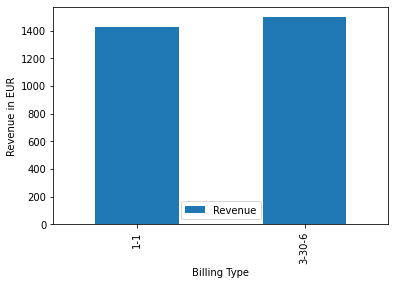

In [7]:
df2.Revenue=pd.to_numeric(df2.Revenue)

df2.plot(x="Billing Type", y="Revenue", kind="bar")
plt.xlabel('Billing Type')
plt.ylabel('Revenue in EUR')
plt.show()

In [8]:
#df2['Billed Min']=pd.to_numeric(df2['Billed Min'])
#df2['Buy Price']=pd.to_numeric(df2['Buy Price'])
#df2['Sell Price']=pd.to_numeric(df2['Sell Price'])